In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate, KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
data1 = pd.read_csv('loan-payments-data.csv')
data1

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bachelor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bachelor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,Some College,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,Some College,female
5,xqd20160706,PAIDOFF,300,7,9/9/2016,9/15/2016,9/9/2016 13:45,NaN,35,Master or Above,male
6,xqd20160007,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/7/2016 23:07,NaN,29,Some College,male
7,xqd20160008,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/5/2016 20:33,NaN,36,Some College,male
8,xqd20160909,PAIDOFF,1000,30,9/9/2016,10/8/2016,10/8/2016 16:00,NaN,28,Some College,male
9,xqd20160010,PAIDOFF,800,15,9/10/2016,9/24/2016,9/24/2016 13:00,NaN,26,Some College,male


In [3]:
data2 = pd.read_csv('data2.csv')
data2

,Customer_ID,Status_Checking_Acc,Duration_in_Months,Credit_History,Purposre_Credit_Taken,Credit_Amount,Savings_Acc,Years_At_Present_Employment,Inst_Rt_Income,Marital_Status_Gender,...,Age,Other_Inst_Plans,Housing,Num_CC,Job,Dependents,Telephone,Foreign_Worker,Default_On_Payment,Count
0,100001,A11,6,A34,A43,1169,A65,A75,4,A93,...,67,A143,A152,2,A173,1,A192,A201,0,1
1,100002,A12,48,A32,A43,5951,A61,A73,2,A92,...,22,A143,A152,1,A173,1,A191,A201,0,1
2,100003,A14,12,A34,A46,2096,A61,A74,2,A93,...,49,A143,A152,1,A172,2,A191,A201,0,1
3,100004,A11,42,A32,A42,7882,A61,A74,2,A93,...,45,A143,A153,1,A173,2,A191,A201,0,1
4,100005,A11,24,A33,A40,4870,A61,A73,3,A93,...,53,A143,A153,2,A173,2,A191,A201,1,1
5,100006,A14,36,A32,A46,9055,A65,A73,2,A93,...,35,A143,A153,1,A172,2,A192,A201,0,1
6,100007,A14,24,A32,A42,2835,A63,A75,3,A93,...,53,A143,A152,1,A173,1,A191,A201,0,1
7,100008,A12,36,A32,A41,6948,A61,A73,2,A93,...,35,A143,A151,1,A174,1,A192,A201,0,1
8,100009,A14,12,A32,A43,3059,A64,A74,2,A91,...,61,A143,A152,1,A172,1,A191,A201,0,1
9,100010,A12,30,A34,A40,5234,A61,A71,4,A94,...,28,A143,A152,2,A174,1,A191,A201,1,1


In [4]:
data3 = pd.read_csv('german_data.csv')
data3

,Unnamed: 0,checking_account_status,duration,credit_history,purpose,credit_amount,savings_account,present_employment_since,installment_rate,personal_status,...,property,age,other_installment_plans,housing,number_credits,job,number_liable,telephone,foreign_worker,riskiness (1 is good 2 is bad)
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,2,A14,12,A34,A46,2096,A61,A74,2,A93,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,3,A11,42,A32,A42,7882,A61,A74,2,A93,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,4,A11,24,A33,A40,4870,A61,A73,3,A93,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,5,A14,36,A32,A46,9055,A65,A73,2,A93,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,6,A14,24,A32,A42,2835,A63,A75,3,A93,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,7,A12,36,A32,A41,6948,A61,A73,2,A93,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,8,A14,12,A32,A43,3059,A64,A74,2,A91,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,9,A12,30,A34,A40,5234,A61,A71,4,A94,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [5]:
combined_data = pd.read_csv('clean_score_data.csv')
combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)","years_at_present_employment (0 = unemployed, 1 = less than 1 year, 2 = between 1 and 4 years, 3 = between 4 and 7 years, 4 = more than 7 years)",years_at_current_address,"rent_housing (0 = no, 1 = yes)","own_housing (0 = no, 1 = yes)","free_housing (0 = no, 1 = yes)",number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)"
0,0,1000.0,-28.0,1.0,45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1000.0,-28.0,0.0,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1000.0,-25.0,0.0,33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1000.0,-24.0,1.0,27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1000.0,-24.0,1.0,28,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1000.0,-22.0,0.0,35,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,1000.0,-22.0,1.0,29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,1000.0,-18.0,0.0,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,1000.0,-17.0,1.0,28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,800.0,-16.0,1.0,26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
percentages = [
    (30, [.38, .29, .17, .14]),
    (39, [.41, .18, .1, .19]),
    (49, [.34, .17, .10, .18]),
    (59, [.25, .16, .10, .19]),
    (69, [.16, .13, .09, .20]),
    (1000, [.08, .08, .07, .23]),
]
def get_random_credit_score(bucket):
    if bucket == 0:
        return random.randint(400, 620)
    if bucket == 1:
        return random.randint(621, 680)
    if bucket == 2:
        return random.randint(681, 720)
    if bucket == 3:
        return random.randint(721, 780)
    return random.randint(781, 850)

def get_credit_score(age):
    for age_max, p in percentages:
        if age <= age_max:
            n = random.random()
            total = 0
            for i, percent in enumerate(p):
                total += percent
                if n <= total:
                    return get_random_credit_score(i)
            return get_random_credit_score(4)
    return 850

combined_data['credit_score'] = combined_data.apply(lambda row: get_credit_score(row['age']), axis=1)
combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)","years_at_present_employment (0 = unemployed, 1 = less than 1 year, 2 = between 1 and 4 years, 3 = between 4 and 7 years, 4 = more than 7 years)",years_at_current_address,"rent_housing (0 = no, 1 = yes)","own_housing (0 = no, 1 = yes)","free_housing (0 = no, 1 = yes)",number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)",credit_score
0,0,1000.0,-28.0,1.0,45,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499
1,0,1000.0,-28.0,0.0,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772
2,0,1000.0,-25.0,0.0,33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780
3,0,1000.0,-24.0,1.0,27,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511
4,0,1000.0,-24.0,1.0,28,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707
5,0,1000.0,-22.0,0.0,35,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732
6,0,1000.0,-22.0,1.0,29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696
7,0,1000.0,-18.0,0.0,36,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617
8,0,1000.0,-17.0,1.0,28,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623
9,0,800.0,-16.0,1.0,26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527


In [7]:
percentages = [
    (24, 649),
    (34, 360),
    (44, 277),
    (54, 220),
    (64, 129),
    (1000, 102),
]

def get_num_friends(age):
    if random.random() < 0.05:
        return 0
    for age_max, mean in percentages:
        if age <= age_max:
            return abs(round(random.normalvariate(mean, 50)))
        
combined_data['num_friends'] = combined_data.apply(lambda row: get_num_friends(row['age']), axis=1)
combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)",...,years_at_current_address,"rent_housing (0 = no, 1 = yes)","own_housing (0 = no, 1 = yes)","free_housing (0 = no, 1 = yes)",number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)",credit_score,num_friends
0,0,1000.0,-28.0,1.0,45,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499,175
1,0,1000.0,-28.0,0.0,50,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772,228
2,0,1000.0,-25.0,0.0,33,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780,358
3,0,1000.0,-24.0,1.0,27,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511,331
4,0,1000.0,-24.0,1.0,28,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707,287
5,0,1000.0,-22.0,0.0,35,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732,345
6,0,1000.0,-22.0,1.0,29,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696,301
7,0,1000.0,-18.0,0.0,36,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617,257
8,0,1000.0,-17.0,1.0,28,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623,392
9,0,800.0,-16.0,1.0,26,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527,363


In [8]:
combined_data['sentiment'] = np.random.random(len(combined_data))
combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)",...,"rent_housing (0 = no, 1 = yes)","own_housing (0 = no, 1 = yes)","free_housing (0 = no, 1 = yes)",number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)",credit_score,num_friends,sentiment
0,0,1000.0,-28.0,1.0,45,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,499,175,0.591028
1,0,1000.0,-28.0,0.0,50,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772,228,0.069626
2,0,1000.0,-25.0,0.0,33,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780,358,0.630676
3,0,1000.0,-24.0,1.0,27,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511,331,0.594730
4,0,1000.0,-24.0,1.0,28,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707,287,0.939901
5,0,1000.0,-22.0,0.0,35,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732,345,0.659452
6,0,1000.0,-22.0,1.0,29,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,696,301,0.904417
7,0,1000.0,-18.0,0.0,36,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,617,257,0.527511
8,0,1000.0,-17.0,1.0,28,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623,392,0.797046
9,0,800.0,-16.0,1.0,26,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527,363,0.665923


In [9]:
def get_num_steps(gender):
    return abs(round(.8*random.normalvariate(5340 if gender == 0 else 4912, 1000) + .2*random.normalvariate(10000, 4000)))

combined_data['steps'] = combined_data.apply(lambda row: get_num_steps(row['gender (0 = male, 1 = female)']), axis=1)
combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)",...,"own_housing (0 = no, 1 = yes)","free_housing (0 = no, 1 = yes)",number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)",credit_score,num_friends,sentiment,steps
0,0,1000.0,-28.0,1.0,45,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,499,175,0.591028,5550
1,0,1000.0,-28.0,0.0,50,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,772,228,0.069626,4344
2,0,1000.0,-25.0,0.0,33,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,780,358,0.630676,6912
3,0,1000.0,-24.0,1.0,27,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,511,331,0.594730,5314
4,0,1000.0,-24.0,1.0,28,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,707,287,0.939901,5331
5,0,1000.0,-22.0,0.0,35,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,732,345,0.659452,7211
6,0,1000.0,-22.0,1.0,29,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,696,301,0.904417,6053
7,0,1000.0,-18.0,0.0,36,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,617,257,0.527511,7158
8,0,1000.0,-17.0,1.0,28,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,623,392,0.797046,6275
9,0,800.0,-16.0,1.0,26,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,527,363,0.665923,5474


In [10]:
minutes_by_age = [
    (39, 40),
    (59, 30),
    (1000, 10),
]

minutes_by_gender = {
    0: 35,
    1: 30,
}

def get_activity_duration(row):
    age = row['age']
    gender = row['gender (0 = male, 1 = female)']
    if random.randint(0, 1) == 0:
        for age_max, mean in minutes_by_age:
            if age <= age_max:
                return abs(round(random.normalvariate(mean, 10) * 60 / 7))
    return abs(round(random.normalvariate(minutes_by_gender[gender], 10) * 60 / 7))

combined_data['activity'] = combined_data.apply(get_activity_duration, axis=1)
combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)",...,"free_housing (0 = no, 1 = yes)",number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)",credit_score,num_friends,sentiment,steps,activity
0,0,1000.0,-28.0,1.0,45,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,499,175,0.591028,5550,306
1,0,1000.0,-28.0,0.0,50,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,772,228,0.069626,4344,166
2,0,1000.0,-25.0,0.0,33,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,780,358,0.630676,6912,343
3,0,1000.0,-24.0,1.0,27,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,511,331,0.594730,5314,418
4,0,1000.0,-24.0,1.0,28,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,707,287,0.939901,5331,390
5,0,1000.0,-22.0,0.0,35,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,732,345,0.659452,7211,270
6,0,1000.0,-22.0,1.0,29,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,696,301,0.904417,6053,363
7,0,1000.0,-18.0,0.0,36,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,617,257,0.527511,7158,216
8,0,1000.0,-17.0,1.0,28,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,623,392,0.797046,6275,319
9,0,800.0,-16.0,1.0,26,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,527,363,0.665923,5474,407


In [11]:
combined_data['nutrition'] = np.random.random(len(combined_data)) * 5

combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)",...,number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)",credit_score,num_friends,sentiment,steps,activity,nutrition
0,0,1000.0,-28.0,1.0,45,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,499,175,0.591028,5550,306,0.993834
1,0,1000.0,-28.0,0.0,50,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,772,228,0.069626,4344,166,0.969963
2,0,1000.0,-25.0,0.0,33,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,780,358,0.630676,6912,343,3.617826
3,0,1000.0,-24.0,1.0,27,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,511,331,0.594730,5314,418,0.400754
4,0,1000.0,-24.0,1.0,28,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,707,287,0.939901,5331,390,0.973749
5,0,1000.0,-22.0,0.0,35,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,732,345,0.659452,7211,270,1.924651
6,0,1000.0,-22.0,1.0,29,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,696,301,0.904417,6053,363,2.481903
7,0,1000.0,-18.0,0.0,36,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,617,257,0.527511,7158,216,4.927152
8,0,1000.0,-17.0,1.0,28,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,623,392,0.797046,6275,319,0.190219
9,0,800.0,-16.0,1.0,26,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,527,363,0.665923,5474,407,2.376157


In [12]:
def fill_nan(column):
    if combined_data[column].isnull().any():
        good_counts = combined_data.loc[combined_data['riskiness (0 =  good, 1 = bad)'] == 0][column].dropna()
        bad_counts = combined_data.loc[combined_data['riskiness (0 =  good, 1 = bad)'] == 1][column].dropna()
        def gen_filler(row):
            if pd.isnull(row[column]):
                return int(np.random.choice(good_counts if row['riskiness (0 =  good, 1 = bad)'] == 0 else bad_counts))
            return row[column]
        combined_data[column] = combined_data.apply(gen_filler, axis=1)

for column in combined_data:
    fill_nan(column)
combined_data

,"riskiness (0 = good, 1 = bad)",principal,"past_due_days (cutoff on 12/8/2016, negative means paid early)","education (0 = high school or below, 1 = some college, 2 = bachelor, 3 = master or above)",age,"gender (0 = male, 1 = female)","money_in_checking_account (0 = less than 0 or no account, 1 = between 0 and 10000, 2 = more than 10000)","credit_history (0 = no credits taken or all credits paid back on time, 1 = existing credits paid back on time until now, 2 = delay in paying back in the past, 3 = critical account/credits at other banks)",credit_amount,"money_in_savings (0 = unknown or no savings account, 1 = less than 1000, 2 = between 1000 and 5000, 3 = between 5000 and 10000, 4 = over 10000)",...,number_of_credits_at_this_bank,"is_employed (0 = unemployed, 1 = employed)",number_of_dependents,"is_foreign_worker (0 = no, 1 = yes)",credit_score,num_friends,sentiment,steps,activity,nutrition
0,0,1000.0,-28.0,1.0,45,0,0.0,3.0,2923.0,1.0,...,1.0,0.0,1.0,1.0,499,175,0.591028,5550,306,0.993834
1,0,1000.0,-28.0,0.0,50,1,0.0,1.0,3331.0,0.0,...,2.0,1.0,1.0,1.0,772,228,0.069626,4344,166,0.969963
2,0,1000.0,-25.0,0.0,33,1,0.0,1.0,3229.0,1.0,...,2.0,1.0,2.0,1.0,780,358,0.630676,6912,343,3.617826
3,0,1000.0,-24.0,1.0,27,0,0.0,3.0,1905.0,0.0,...,1.0,1.0,1.0,1.0,511,331,0.594730,5314,418,0.400754
4,0,1000.0,-24.0,1.0,28,1,0.0,3.0,1278.0,0.0,...,2.0,1.0,1.0,1.0,707,287,0.939901,5331,390,0.973749
5,0,1000.0,-22.0,0.0,35,0,1.0,3.0,12749.0,0.0,...,2.0,1.0,1.0,1.0,732,345,0.659452,7211,270,1.924651
6,0,1000.0,-22.0,1.0,29,0,0.0,3.0,1346.0,2.0,...,2.0,1.0,1.0,1.0,696,301,0.904417,6053,363,2.481903
7,0,1000.0,-18.0,0.0,36,0,0.0,3.0,3069.0,1.0,...,1.0,1.0,1.0,1.0,617,257,0.527511,7158,216,4.927152
8,0,1000.0,-17.0,1.0,28,0,0.0,1.0,754.0,0.0,...,1.0,1.0,1.0,1.0,623,392,0.797046,6275,319,0.190219
9,0,800.0,-16.0,1.0,26,0,1.0,1.0,2171.0,0.0,...,2.0,1.0,1.0,1.0,527,363,0.665923,5474,407,2.376157


In [13]:
percentages = [
    (29, 208),
    (39, 163),
    (49, 173),
    (64, 274),
    (1000, 87),
]

def get_num_connections(age):
    if random.random() < 0.1:
        return 0
    for age_max, mean in percentages:
        if age <= age_max:
            return abs(round(random.normalvariate(mean, 30)))
        
combined_data['num_connections'] = combined_data.apply(lambda row: get_num_connections(row['age']), axis=1)
combined_data['num_connections']

0       206
1         0
2       133
3       204
4         0
5       137
6       249
7       154
8       213
9       199
10        0
11      197
12      237
13        0
14      212
15      221
16      186
17      132
18      115
19      185
20      175
21      214
22      255
23      218
24      243
25      232
26      122
27      200
28      146
29      116
       ... 
5470    229
5471    190
5472    165
5473      0
5474    124
5475    286
5476    271
5477    111
5478    192
5479    209
5480    179
5481    161
5482    220
5483    217
5484      0
5485    226
5486    169
5487    234
5488    192
5489    176
5490    199
5491    154
5492    139
5493    140
5494    281
5495    139
5496    131
5497    141
5498    198
5499      0
Name: num_connections, Length: 5500, dtype: int64

In [83]:
def rename_column(name):
    if name.startswith('years_at_present_employment'):
        return 'years_at_present_job'
    idx = name.find(' (')
    if idx == -1:
        return name
    return name[:idx]

data = combined_data.rename(columns=rename_column).sample(frac=1)
data.to_csv('final_data.csv')
data

,riskiness,principal,past_due_days,education,age,gender,money_in_checking_account,credit_history,credit_amount,money_in_savings,...,is_employed,number_of_dependents,is_foreign_worker,credit_score,num_friends,sentiment,steps,activity,nutrition,num_connections
5125,1,800.0,74.0,0.0,35,0,0.0,3.0,7855.0,1.0,...,1.0,1.0,1.0,541,228,0.176982,8765,186,2.723622,129
1979,0,800.0,1.0,0.0,44,0,2.0,1.0,1474.0,1.0,...,1.0,1.0,1.0,843,324,0.248178,7840,240,3.987628,170
4686,0,1000.0,1.0,1.0,74,1,1.0,3.0,5743.0,1.0,...,1.0,1.0,1.0,763,54,0.907234,5298,247,0.184096,0
3759,0,800.0,0.0,1.0,57,1,1.0,1.0,3195.0,0.0,...,1.0,1.0,1.0,452,126,0.181388,6981,319,1.762568,337
2981,1,800.0,59.0,0.0,26,0,0.0,1.0,2302.0,1.0,...,1.0,1.0,1.0,737,354,0.852465,5973,182,0.699975,226
4039,0,800.0,0.0,0.0,45,1,1.0,3.0,3617.0,1.0,...,1.0,1.0,1.0,677,235,0.972388,6620,152,2.379077,173
4305,0,1000.0,-1.0,1.0,24,0,0.0,3.0,4139.0,2.0,...,1.0,1.0,1.0,466,574,0.944337,7562,463,4.232251,140
4367,1,1000.0,74.0,1.0,42,0,0.0,3.0,4281.0,3.0,...,1.0,1.0,1.0,471,286,0.125787,5649,330,0.736905,187
2040,0,1000.0,-3.0,0.0,23,0,0.0,2.0,1503.0,1.0,...,1.0,1.0,1.0,671,578,0.615942,5937,531,1.539423,0
4294,1,800.0,28.0,1.0,32,0,1.0,1.0,4057.0,1.0,...,1.0,1.0,1.0,746,0,0.229663,5877,416,4.310427,142


In [86]:
X = data.loc[:, (data.columns != 'riskiness') & (data.columns != 'past_due_days')]
y = data['riskiness']

cross_validate(RandomForestClassifier(), X, y, return_train_score=False)

{'fit_time': array([ 0.0883925 ,  0.07156229,  0.05915451]),
 'score_time': array([ 0.00933123,  0.00390601,  0.00369263]),
 'test_score': array([ 0.75899673,  0.7655398 ,  0.75436681])}

In [66]:
idx_test = set(random.sample(list(range(len(X))), round(0.25*len(X))))
train_indices = list(x for x in range(len(X)) if x not in idx_test)
test_indices = list(idx_test)
trainX, trainY = X.iloc[train_indices], y[train_indices]
testX, testY = X.iloc[test_indices], y[test_indices]

example = RandomForestClassifier()
example.fit(trainX, trainY)
preds = example.predict(testX)
pd.crosstab(testY, preds)

col_0,0,1
riskiness,,
0,912,41
1,296,126


Feature ranking:
1. feature 6 (0.151755)
2. feature 20 (0.070260)
3. feature 5 (0.068915)
4. feature 19 (0.066270)
5. feature 17 (0.065739)
6. feature 22 (0.064706)
7. feature 21 (0.062768)
8. feature 23 (0.062453)
9. feature 18 (0.062163)
10. feature 2 (0.053585)
11. feature 7 (0.043682)
12. feature 8 (0.040289)
13. feature 9 (0.035243)
14. feature 4 (0.022461)
15. feature 13 (0.022332)
16. feature 1 (0.020999)
17. feature 11 (0.016451)
18. feature 15 (0.014996)
19. feature 12 (0.012440)
20. feature 0 (0.012178)
21. feature 3 (0.010679)
22. feature 10 (0.009652)
23. feature 16 (0.007461)
24. feature 14 (0.002522)


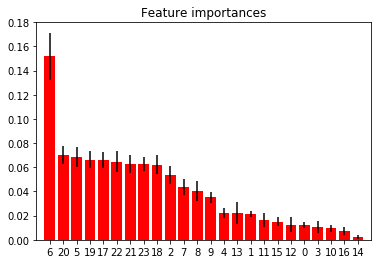

In [19]:
clf = RandomForestClassifier()
clf.fit(X, y)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [29]:
list(X.columns[i] for i in indices)

['credit_amount',
 'steps',
 'credit_history',
 'sentiment',
 'credit_score',
 'nutrition',
 'activity',
 'num_connections',
 'num_friends',
 'age',
 'money_in_savings',
 'years_at_present_job',
 'years_at_current_address',
 'money_in_checking_account',
 'number_of_credits_at_this_bank',
 'education',
 'own_housing',
 'number_of_dependents',
 'free_housing',
 'principal',
 'gender',
 'rent_housing',
 'is_foreign_worker',
 'is_employed']

In [34]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))

In [36]:
list(X.columns)

['principal',
 'education',
 'age',
 'gender',
 'money_in_checking_account',
 'credit_history',
 'credit_amount',
 'money_in_savings',
 'years_at_present_job',
 'years_at_current_address',
 'rent_housing',
 'own_housing',
 'free_housing',
 'number_of_credits_at_this_bank',
 'is_employed',
 'number_of_dependents',
 'is_foreign_worker',
 'credit_score',
 'num_friends',
 'sentiment',
 'steps',
 'activity',
 'nutrition',
 'num_connections']

In [44]:
clf.
#clf.decision_path(X.iloc[0].values.reshape(1, -1))

(<1x18194 sparse matrix of type '<class 'numpy.int64'>'
 	with 137 stored elements in Compressed Sparse Row format>,
 array([    0,  1845,  3716,  5485,  7272,  9119, 10868, 12663, 14574,
        16403, 18194]))

In [58]:
test = X.iloc[0].values.reshape(1, -1)
clf.predict_proba(test)[0][clf.predict(test)[0]]

0.90000000000000002

In [79]:
len(data[data['riskiness'] == 0]['riskiness']) / len(data)

0.7067272727272728